In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TRAINING DATA- EDA AND PREPROCESSING  

In [2]:
train_data=pd.read_csv('train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.shape

(614, 13)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Removing the null values

train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

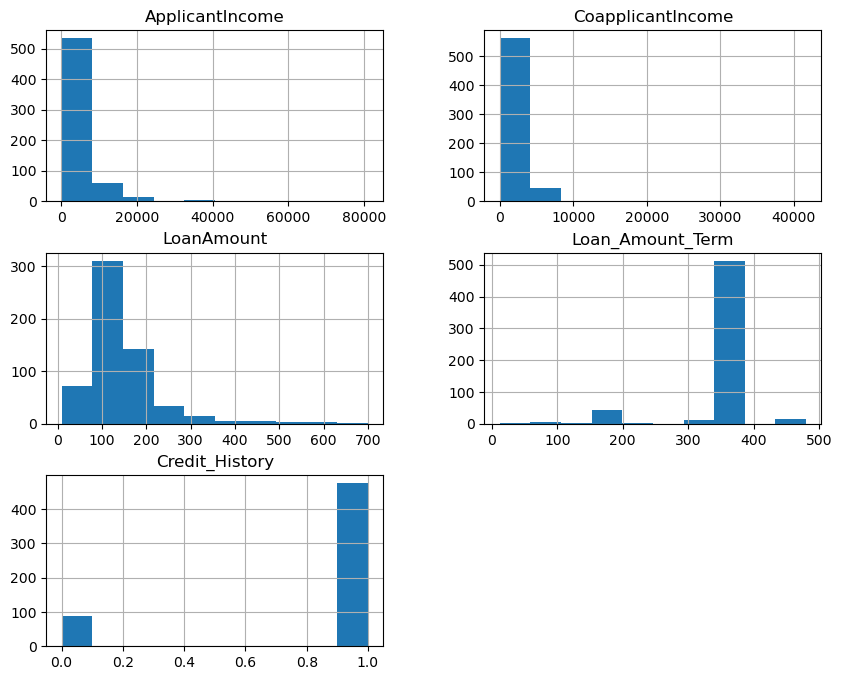

In [7]:
#Plotting to find the distribution

freqgraph=train_data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [8]:
#The data we got here is skewed data.So we have to replace the null values with the median value. The null values are identified in columns Gender,Married,
#Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History.

In [9]:
train_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
ind1=np.where(train_data['Dependents']=='3+')
for i in ind1:
    train_data['Dependents'].loc[i]='3'
        
train_data['Dependents'].unique()
       

C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\2350620113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Dependents'].loc[i]='3'


array(['0', '1', '2', '3', nan], dtype=object)

In [11]:
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].median())
train_data['Dependents'].unique()

array(['0', '1', '2', '3', 0.0], dtype=object)

In [12]:
#Changing the data type to int64 for 'Dependents' column
train_data['Dependents']=train_data['Dependents'].astype('int64')

In [13]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
for col in ('LoanAmount','Loan_Amount_Term','Credit_History'):
    train_data[col]=train_data[col].fillna(train_data[col].median())

In [15]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
for col in ('Gender','Married','Self_Employed'):
    train_data[col]=train_data[col].fillna(train_data[col].mode)

In [17]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# Outlier detection

In [20]:
# Outlier detection in columns 'Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'
Q1=np.percentile(train_data['Dependents'],25,interpolation='midpoint')
Q2=np.percentile(train_data['Dependents'],50,interpolation='midpoint')
Q3=np.percentile(train_data['Dependents'],75,interpolation='midpoint')
Q1,Q2,Q3

(0.0, 0.0, 1.0)

In [21]:
print(train_data['Dependents'].median())

0.0


In [22]:
IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=train_data['Dependents']<low_limit
print(train_data['Dependents'].loc[ind1].index)

ind2=train_data['Dependents']>up_limit
print(train_data['Dependents'].loc[ind2].index)

Int64Index([], dtype='int64')
Int64Index([  7,  34,  61,  68,  73,  74,  78,  79, 109, 126, 135, 155, 171,
            172, 177, 202, 211, 213, 215, 255, 257, 259, 267, 295, 321, 324,
            338, 340, 343, 352, 359, 376, 390, 391, 409, 442, 461, 466, 472,
            481, 515, 522, 531, 539, 557, 567, 574, 592, 600, 602, 610],
           dtype='int64')


In [23]:
#Outlier replaced with median:
for i in train_data['Dependents'].loc[ind2].index:
     train_data['Dependents'].loc[i]=0.0
        
ind2=train_data['Dependents']>up_limit
print(train_data['Dependents'].loc[ind2].index)


Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\2751080025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Dependents'].loc[i]=0.0


In [24]:
Q1=np.percentile(train_data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(train_data['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(train_data['ApplicantIncome'],75,interpolation='midpoint')
Q1,Q2,Q3

print(train_data['ApplicantIncome'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=train_data['ApplicantIncome']<low_limit
print(train_data['ApplicantIncome'].loc[ind1].index)

ind2=train_data['ApplicantIncome']>up_limit
print(train_data['ApplicantIncome'].loc[ind2].index)


3812.5
Int64Index([], dtype='int64')
Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')


In [25]:
#Outlier replaced with median
for i in train_data['ApplicantIncome'].loc[ind2].index:
     train_data['ApplicantIncome'].loc[i]=3812.5
        
ind2=train_data['ApplicantIncome']>up_limit
print(train_data['ApplicantIncome'].loc[ind2].index)

Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\1878930504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ApplicantIncome'].loc[i]=3812.5


In [26]:
Q1=np.percentile(train_data['CoapplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(train_data['CoapplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(train_data['CoapplicantIncome'],75,interpolation='midpoint')
Q1,Q2,Q3

print(train_data['CoapplicantIncome'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=train_data['CoapplicantIncome']<low_limit
print(train_data['CoapplicantIncome'].loc[ind1].index)

ind2=train_data['CoapplicantIncome']>up_limit
print(train_data['CoapplicantIncome'].loc[ind2].index)

1188.5
Int64Index([], dtype='int64')
Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')


In [27]:
#Outlier replaced with median
for i in train_data['CoapplicantIncome'].loc[ind2].index:
     train_data['CoapplicantIncome'].loc[i]=1188.5
        
ind2=train_data['CoapplicantIncome']>up_limit
print(train_data['CoapplicantIncome'].loc[ind2].index)

Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\3105209708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['CoapplicantIncome'].loc[i]=1188.5


In [28]:
Q1=np.percentile(train_data['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(train_data['LoanAmount'],50,interpolation='midpoint')
Q3=np.percentile(train_data['LoanAmount'],75,interpolation='midpoint')
Q1,Q2,Q3

print(train_data['LoanAmount'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=train_data['LoanAmount']<low_limit
print(train_data['LoanAmount'].loc[ind1].index)

ind2=train_data['LoanAmount']>up_limit
print(train_data['LoanAmount'].loc[ind2].index)

128.0
Int64Index([], dtype='int64')
Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')


In [29]:
#Outlier replaced with median
for i in train_data['LoanAmount'].loc[ind2].index:
     train_data['LoanAmount'].loc[i]=128.0
        
ind2=train_data['LoanAmount']>up_limit
print(train_data['LoanAmount'].loc[ind2].index)

Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\3434594067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['LoanAmount'].loc[i]=128.0


In [30]:
Q1=np.percentile(train_data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2=np.percentile(train_data['Loan_Amount_Term'],50,interpolation='midpoint')
Q3=np.percentile(train_data['Loan_Amount_Term'],75,interpolation='midpoint')
Q1,Q2,Q3

print(train_data['Loan_Amount_Term'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=train_data['Loan_Amount_Term']<low_limit
print(train_data['Loan_Amount_Term'].loc[ind1].index)

ind2=train_data['Loan_Amount_Term']>up_limit
print(train_data['Loan_Amount_Term'].loc[ind2].index)

360.0
Int64Index([ 14,  16,  62,  66,  68,  72,  78,  84,  91,  94,  98, 100, 115,
            128, 133, 142, 144, 155, 164, 171, 172, 182, 186, 189, 202, 231,
            241, 242, 245, 247, 253, 262, 282, 286, 313, 315, 333, 334, 355,
            363, 372, 373, 375, 385, 393, 400, 401, 408, 429, 435, 444, 451,
            453, 461, 466, 471, 476, 495, 497, 504, 513, 539, 540, 546, 554,
            575, 585, 590, 591, 593, 600, 605, 610],
           dtype='int64')
Int64Index([75, 109, 130, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500,
            516, 573],
           dtype='int64')


In [31]:
#Outlier replaced with median
for i in train_data['Loan_Amount_Term'].loc[ind1].index:
     train_data['Loan_Amount_Term'].loc[i]=360.0
for i in train_data['Loan_Amount_Term'].loc[ind2].index:
     train_data['Loan_Amount_Term'].loc[i]=360.0             
        
ind1=train_data['Loan_Amount_Term']<low_limit
print(train_data['Loan_Amount_Term'].loc[ind1].index)

ind2=train_data['Loan_Amount_Term']>up_limit
print(train_data['Loan_Amount_Term'].loc[ind2].index)


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\2241037285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Loan_Amount_Term'].loc[i]=360.0
C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\2241037285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Loan_Amount_Term'].loc[i]=360.0


Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [32]:
Q1=np.percentile(train_data['Credit_History'],25,interpolation='midpoint')
Q2=np.percentile(train_data['Credit_History'],50,interpolation='midpoint')
Q3=np.percentile(train_data['Credit_History'],75,interpolation='midpoint')
Q1,Q2,Q3

print(train_data['Credit_History'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=train_data['Credit_History']<low_limit
print(train_data['Credit_History'].loc[ind1].index)

ind2=train_data['Credit_History']>up_limit
print(train_data['Credit_History'].loc[ind2].index)

1.0
Int64Index([  7,  17,  20,  22,  23,  36,  48,  54,  62,  63,  64,  66,  69,
             73,  78, 108, 112, 122, 128, 138, 150, 155, 162, 168, 177, 179,
            180, 186, 201, 211, 218, 220, 250, 254, 256, 267, 280, 291, 293,
            300, 307, 325, 326, 338, 346, 353, 358, 367, 373, 387, 396, 399,
            400, 408, 409, 412, 414, 421, 423, 431, 438, 448, 450, 452, 453,
            464, 466, 471, 477, 486, 494, 499, 517, 527, 532, 541, 548, 550,
            553, 554, 564, 567, 569, 571, 576, 584, 589, 597, 613],
           dtype='int64')
Int64Index([], dtype='int64')


In [33]:
#Outlier replaced with median
for i in train_data['Credit_History'].loc[ind1].index:
     train_data['Credit_History'].loc[i]=1.0
        
for i in train_data['Credit_History'].loc[ind2].index:
     train_data['Credit_History'].loc[i]=1.0
             
        
ind1=train_data['Credit_History']<low_limit
print(train_data['Credit_History'].loc[ind1].index)

ind2=train_data['Credit_History']>up_limit
print(train_data['Credit_History'].loc[ind2].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\2861450752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_History'].loc[i]=1.0


In [34]:
data1=train_data.drop('Loan_ID',axis=1)

In [71]:
#Defining the target and feature columns

x_train=data1.drop('Loan_Status',axis=1)
y_train=data1['Loan_Status']

In [73]:
x_train=pd.get_dummies(x_train)

# Testing Data-EDA and Preprocessing

In [37]:
test_data=pd.read_csv('test_lAUu6dG.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [38]:
test_data.shape

(367, 12)

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [40]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [41]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [42]:
test_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

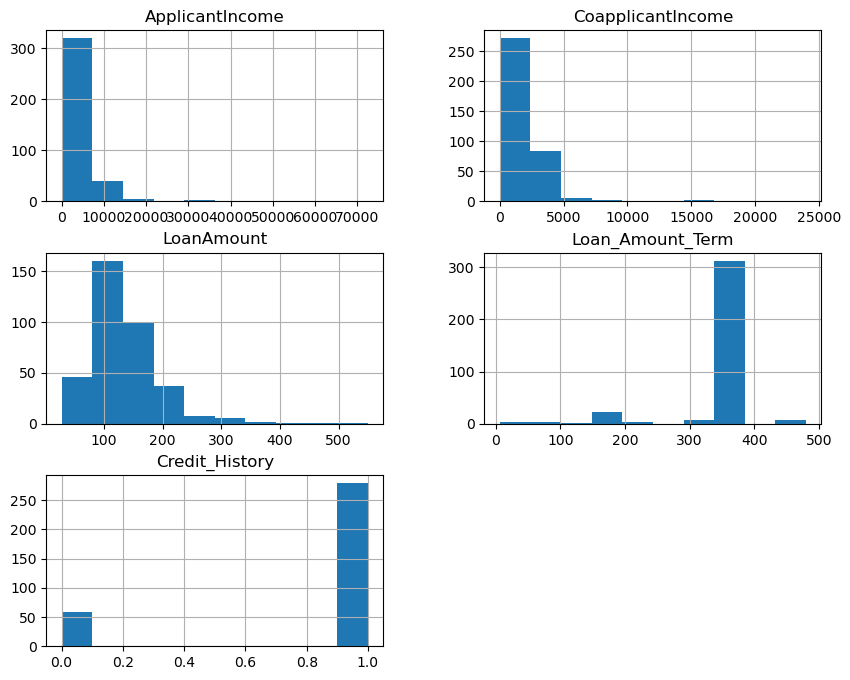

In [43]:
freqgraph=test_data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [44]:
ind1=np.where(test_data['Dependents']=='3+')
for i in ind1:
    test_data['Dependents'].loc[i]='3'
        
test_data['Dependents'].unique()

C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\2938761387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Dependents'].loc[i]='3'


array(['0', '1', '2', '3', nan], dtype=object)

In [45]:
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].median())
test_data['Dependents'].unique()

array(['0', '1', '2', '3', 0.0], dtype=object)

In [46]:
#Changing the data type to int64 for 'Dependents' column
test_data['Dependents']=test_data['Dependents'].astype('int64')

In [47]:
for col in ('LoanAmount','Loan_Amount_Term','Credit_History'):
    test_data[col]=test_data[col].fillna(test_data[col].median())

In [48]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [49]:
for col in ('Gender','Self_Employed'):
    test_data[col]=test_data[col].fillna(test_data[col].mode)

In [50]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Detection

In [51]:
# Outlier detection in columns 'Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'
Q1=np.percentile(test_data['Dependents'],25,interpolation='midpoint')
Q2=np.percentile(test_data['Dependents'],50,interpolation='midpoint')
Q3=np.percentile(test_data['Dependents'],75,interpolation='midpoint')
Q1,Q2,Q3

(0.0, 0.0, 2.0)

In [52]:
print(test_data['Dependents'].median())

0.0


In [53]:
IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=test_data['Dependents']<low_limit
print(test_data['Dependents'].loc[ind1].index)

ind2=test_data['Dependents']>up_limit
print(test_data['Dependents'].loc[ind2].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [54]:
Q1=np.percentile(test_data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(test_data['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(test_data['ApplicantIncome'],75,interpolation='midpoint')
Q1,Q2,Q3

print(test_data['ApplicantIncome'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=test_data['ApplicantIncome']<low_limit
print(test_data['ApplicantIncome'].loc[ind1].index)

ind2=test_data['ApplicantIncome']>up_limit
print(test_data['ApplicantIncome'].loc[ind2].index)

3786.0
Int64Index([], dtype='int64')
Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')


In [55]:
#Outlier replaced with median
for i in test_data['ApplicantIncome'].loc[ind2].index:
     test_data['ApplicantIncome'].loc[i]=3786.0
        
ind2=test_data['ApplicantIncome']>up_limit
print(test_data['ApplicantIncome'].loc[ind2].index)

Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\202792965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ApplicantIncome'].loc[i]=3786.0


In [56]:
Q1=np.percentile(test_data['CoapplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(test_data['CoapplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(test_data['CoapplicantIncome'],75,interpolation='midpoint')
Q1,Q2,Q3

print(test_data['CoapplicantIncome'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=test_data['CoapplicantIncome']<low_limit
print(test_data['CoapplicantIncome'].loc[ind1].index)

ind2=test_data['CoapplicantIncome']>up_limit
print(test_data['CoapplicantIncome'].loc[ind2].index)

1025.0
Int64Index([], dtype='int64')
Int64Index([18, 25, 85, 123, 230, 237, 284, 351], dtype='int64')


In [57]:
#Outlier replaced with median
for i in test_data['CoapplicantIncome'].loc[ind2].index:
     test_data['CoapplicantIncome'].loc[i]=1025.0
        
ind2=test_data['CoapplicantIncome']>up_limit
print(test_data['CoapplicantIncome'].loc[ind2].index)

Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\3124226674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['CoapplicantIncome'].loc[i]=1025.0


In [58]:
Q1=np.percentile(test_data['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(test_data['LoanAmount'],50,interpolation='midpoint')
Q3=np.percentile(test_data['LoanAmount'],75,interpolation='midpoint')
Q1,Q2,Q3

print(test_data['LoanAmount'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=test_data['LoanAmount']<low_limit
print(test_data['LoanAmount'].loc[ind1].index)

ind2=test_data['LoanAmount']>up_limit
print(test_data['LoanAmount'].loc[ind2].index)

125.0
Int64Index([], dtype='int64')
Int64Index([8, 18, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 284, 285,
            331, 345, 350],
           dtype='int64')


In [59]:
#Outlier replaced with median
for i in test_data['LoanAmount'].loc[ind2].index:
     test_data['LoanAmount'].loc[i]=125.0
        
ind2=test_data['LoanAmount']>up_limit
print(test_data['LoanAmount'].loc[ind2].index)

Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\1400710615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LoanAmount'].loc[i]=125.0


In [60]:
Q1=np.percentile(test_data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2=np.percentile(test_data['Loan_Amount_Term'],50,interpolation='midpoint')
Q3=np.percentile(test_data['Loan_Amount_Term'],75,interpolation='midpoint')
Q1,Q2,Q3

print(test_data['Loan_Amount_Term'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=test_data['Loan_Amount_Term']<low_limit
print(test_data['Loan_Amount_Term'].loc[ind1].index)

ind2=test_data['Loan_Amount_Term']>up_limit
print(test_data['Loan_Amount_Term'].loc[ind2].index)

360.0
Int64Index([  8,  12,  19,  21,  29,  36,  53,  57,  59,  72,  84,  85, 103,
            128, 134, 141, 144, 145, 155, 157, 164, 173, 190, 215, 216, 223,
            232, 245, 249, 251, 277, 312, 314, 315, 322, 325, 338, 340, 342,
            349, 354, 366],
           dtype='int64')
Int64Index([82, 101, 200, 222, 239, 250, 266, 295], dtype='int64')


In [61]:
#Outlier replaced with median
for i in test_data['Loan_Amount_Term'].loc[ind1].index:
     test_data['Loan_Amount_Term'].loc[i]=360.0
for i in test_data['Loan_Amount_Term'].loc[ind2].index:
     test_data['Loan_Amount_Term'].loc[i]=360.0             
        
ind1=test_data['Loan_Amount_Term']<low_limit
print(test_data['Loan_Amount_Term'].loc[ind1].index)

ind2=test_data['Loan_Amount_Term']>up_limit
print(test_data['Loan_Amount_Term'].loc[ind2].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\3397094975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Loan_Amount_Term'].loc[i]=360.0
C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\3397094975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Loan_Amount_Term'].loc[i]=360.0


In [62]:
Q1=np.percentile(test_data['Credit_History'],25,interpolation='midpoint')
Q2=np.percentile(test_data['Credit_History'],50,interpolation='midpoint')
Q3=np.percentile(test_data['Credit_History'],75,interpolation='midpoint')
Q1,Q2,Q3

print(test_data['Credit_History'].median())

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

ind1=test_data['Credit_History']<low_limit
print(test_data['Credit_History'].loc[ind1].index)

ind2=test_data['Credit_History']>up_limit
print(test_data['Credit_History'].loc[ind2].index)

1.0
Int64Index([  7,  13,  25,  35,  55,  58,  63,  66,  67,  69,  80,  82,  84,
             94, 101, 106, 117, 118, 119, 123, 124, 126, 140, 142, 147, 153,
            161, 165, 166, 168, 173, 174, 192, 193, 196, 198, 211, 224, 229,
            235, 236, 241, 243, 245, 250, 255, 266, 268, 273, 274, 278, 293,
            301, 311, 317, 325, 339, 346, 354],
           dtype='int64')
Int64Index([], dtype='int64')


In [63]:
#Outlier replaced with median
for i in test_data['Credit_History'].loc[ind1].index:
     test_data['Credit_History'].loc[i]=1.0

             
        
ind1=test_data['Credit_History']<low_limit
print(test_data['Credit_History'].loc[ind1].index)


Int64Index([], dtype='int64')


C:\Users\NOHIN JACOB\AppData\Local\Temp\ipykernel_8684\1338970515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Credit_History'].loc[i]=1.0


In [68]:
data2=test_data.drop('Loan_ID',axis=1)


In [65]:
#Defining the feature columns

x_test=data2
x_test=pd.get_dummies(x_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)